In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


1. Importing the required packages for the project


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img,img_to_array
from keras.preprocessing import image
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

2. Loading and Preprocessing the data

In [ ]:
#preparation of data
import os
X=[]
Y=[]
path = "/content/drive/MyDrive/Colab Notebooks/dataset/covid"
for image in os.listdir(path):
  img_path = os.path.join(path,image)
  img = load_img(img_path,target_size=(224,224))
  img = img_to_array(img)
  X.append(img)
  Y.append(1)
path = "/content/drive/MyDrive/Colab Notebooks/dataset/normal"
for image in os.listdir(path):
  img_path = os.path.join(path,image)
  img = load_img(img_path,target_size=(224,224))
  img = img_to_array(img)
  X.append(img)
  Y.append(0)
X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(392, 224, 224, 3)
(392,)


3. Splitting the data into train and test

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(313, 224, 224, 3)
(79, 224, 224, 3)
(313,)
(79,)


4. Data Preprocessing and Data Augmentation

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = image.ImageDataGenerator(rescale=1./255)

5. Creating Train and Test Generator

In [ ]:
train_generator = train_datagen.flow(
    X_train,
    y=Y_train,
    batch_size=32,
    shuffle=True
)

In [ ]:
test_generator = test_datagen.flow(
    X_test,
    y=Y_test,
    batch_size=32,
    shuffle=True
)

6. Creating Model

In [ ]:
#model creation
model = Sequential()
model.add(Conv2D(32,kernel_size= (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 64)       

7. Plotting CNN Model

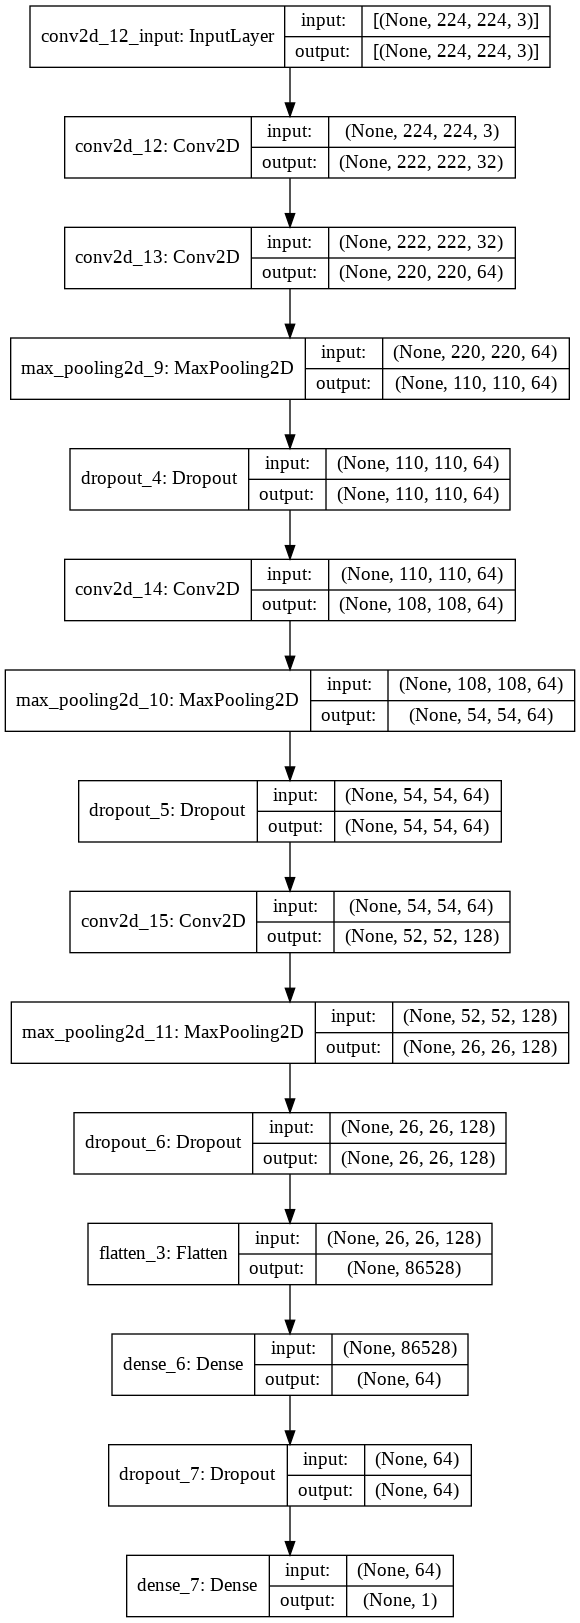

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

8. Model fit generation and evaluation

In [ ]:
out = model.fit_generator(train_generator,steps_per_epoch=8,epochs=10,validation_data=test_generator,validation_steps=2)

Epoch 1/10
8/8 [==============================] - 3s 369ms/step - loss: 0.5338 - accuracy: 0.8394 - val_loss: 0.3511 - val_accuracy: 0.9375
Epoch 2/10
8/8 [==============================] - 3s 344ms/step - loss: 0.4208 - accuracy: 0.8835 - val_loss: 0.4897 - val_accuracy: 0.9062
Epoch 3/10
8/8 [==============================] - 3s 344ms/step - loss: 0.4885 - accuracy: 0.8273 - val_loss: 0.4567 - val_accuracy: 0.9375
Epoch 4/10
8/8 [==============================] - 3s 357ms/step - loss: 0.3350 - accuracy: 0.9219 - val_loss: 0.2227 - val_accuracy: 0.9375
Epoch 5/10
8/8 [==============================] - 3s 341ms/step - loss: 0.2235 - accuracy: 0.9197 - val_loss: 0.1832 - val_accuracy: 0.9375
Epoch 6/10
8/8 [==============================] - 3s 362ms/step - loss: 0.1499 - accuracy: 0.9478 - val_loss: 0.0702 - val_accuracy: 0.9844
Epoch 7/10
8/8 [==============================] - 3s 346ms/step - loss: 0.1093 - accuracy: 0.9478 - val_loss: 0.2244 - val_accuracy: 0.9219
Epoch 8/10
8/8 [====

In [ ]:
y_pred = model.predict_classes(X_test)

In [ ]:
model.save("model_1.h5")

In [ ]:
model.evaluate_generator(train_generator)

[0.06610023230314255, 0.9776358008384705]

In [ ]:
model.evaluate_generator(test_generator)

[0.1397395133972168, 0.9620253443717957]

9. Plotting Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(Y_test, y_pred)

cm

array([[27,  1],
       [ 2, 49]])

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.98      0.96      0.97        51

    accuracy                           0.96        79
   macro avg       0.96      0.96      0.96        79
weighted avg       0.96      0.96      0.96        79



In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(Y_test, y_pred)

0.9180254323735756

10. Plotting training and validation loss

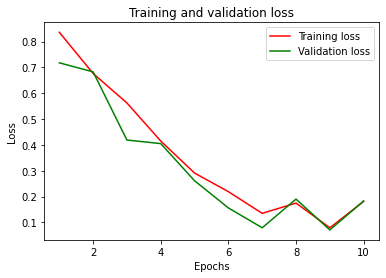

In [ ]:
loss = out.history['loss']
val_loss = out.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

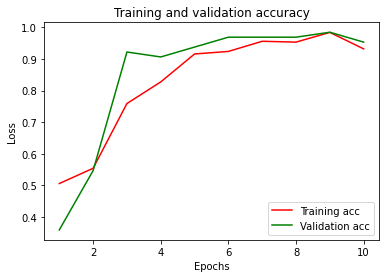

In [ ]:
acc = out.history['accuracy']
val_acc = out.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

11. Plotting Confusion Matrix heatmap

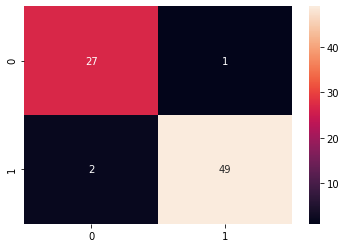

In [ ]:
sns.heatmap(cm,annot=True)

Testing out other models without data augmentation and dropout layers

In [ ]:
non_aug_out = model.fit(X_train,Y_train,epochs=10,validation_steps=2,steps_per_epoch=8)

Epoch 1/10
8/8 [==============================] - 1s 141ms/step - loss: 27.4222 - accuracy: 0.9105
Epoch 2/10
8/8 [==============================] - 1s 144ms/step - loss: 5.6873 - accuracy: 0.6933
Epoch 3/10
8/8 [==============================] - 1s 144ms/step - loss: 0.1129 - accuracy: 0.9649
Epoch 4/10
8/8 [==============================] - 1s 144ms/step - loss: 0.2053 - accuracy: 0.9457
Epoch 5/10
8/8 [==============================] - 1s 145ms/step - loss: 0.0951 - accuracy: 0.9617
Epoch 6/10
8/8 [==============================] - 1s 144ms/step - loss: 0.1024 - accuracy: 0.9776
Epoch 7/10
8/8 [==============================] - 1s 145ms/step - loss: 0.1123 - accuracy: 0.9808
Epoch 8/10
8/8 [==============================] - 1s 144ms/step - loss: 0.0717 - accuracy: 0.9808
Epoch 9/10
8/8 [==============================] - 1s 144ms/step - loss: 0.0670 - accuracy: 0.9808
Epoch 10/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0589 - accuracy: 0.9904


In [ ]:
model_new = Sequential()
model_new.add(Conv2D(32,kernel_size= (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_new.add(Conv2D(64, (3, 3), activation='relu'))
model_new.add(MaxPooling2D((2, 2)))


model_new.add(Conv2D(64, (3, 3), activation='relu'))
model_new.add(MaxPooling2D((2, 2)))


model_new.add(Conv2D(128, (3, 3), activation='relu'))
model_new.add(MaxPooling2D((2, 2)))


model_new.add(Flatten())
model_new.add(Dense(64, activation='relu'))

model_new.add(Dense(1, activation='sigmoid'))


model_new.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:

out1 = model_new.fit_generator(train_generator,steps_per_epoch=8,epochs=10,validation_data=test_generator,validation_steps=2)

Epoch 1/10
8/8 [==============================] - 3s 370ms/step - loss: 1.0076 - accuracy: 0.5514 - val_loss: 0.8027 - val_accuracy: 0.3281
Epoch 2/10
8/8 [==============================] - 3s 343ms/step - loss: 0.6840 - accuracy: 0.5297 - val_loss: 0.6442 - val_accuracy: 0.9062
Epoch 3/10
8/8 [==============================] - 3s 347ms/step - loss: 0.5845 - accuracy: 0.7065 - val_loss: 0.2991 - val_accuracy: 0.9219
Epoch 4/10
8/8 [==============================] - 3s 341ms/step - loss: 0.4656 - accuracy: 0.8142 - val_loss: 0.3104 - val_accuracy: 0.8906
Epoch 5/10
8/8 [==============================] - 3s 339ms/step - loss: 0.5170 - accuracy: 0.7351 - val_loss: 0.2847 - val_accuracy: 0.9531
Epoch 6/10
8/8 [==============================] - 3s 340ms/step - loss: 0.2958 - accuracy: 0.9195 - val_loss: 0.2120 - val_accuracy: 0.9375
Epoch 7/10
8/8 [==============================] - 3s 344ms/step - loss: 0.2114 - accuracy: 0.9224 - val_loss: 0.1385 - val_accuracy: 0.9531
Epoch 8/10
8/8 [====

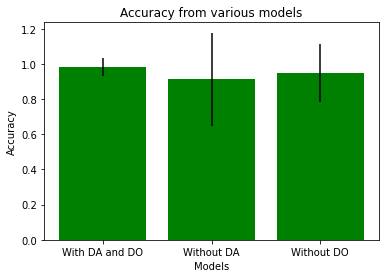

DA -- Data Augmentation
DO -- Dropout Layers


In [ ]:
x = ["With DA and DO","Without DA","Without DO"]

energy = [out.history['accuracy'][-1], non_aug_out.history['accuracy'][-1], out1.history['accuracy'][-1]]
variance =[out.history['loss'][-1], non_aug_out.history['loss'][-1], out1.history['loss'][-1]]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green', yerr=variance)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy from various models")

plt.xticks(x_pos, x)

plt.show()

print("DA -- Data Augmentation\nDO -- Dropout Layers")

Results

In [ ]:
def get_array(img_path):
  img = load_img(img_path,target_size=(224,224))
  img = img_to_array(img)
  img = np.expand_dims(img,axis=0)
  return img

Testing the result with Covid-19 X-ray


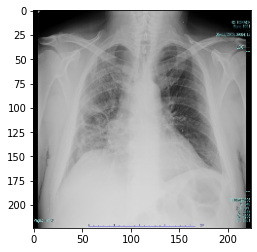

In [ ]:
import cv2
print("Testing the result with Covid-19 X-ray")
covid_path="/content/drive/MyDrive/Colab Notebooks/dataset/covid/80446565-E090-4187-A031-9D3CEAA586C8.jpeg"
test_1 = get_array(covid_path)
im = cv2.imread(covid_path)
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
result_1 = model.predict_classes(test_1)
output = {1:"covid patient",0:"Normal patient"}
print(output[result_1[0][0]])

covid patient


Testing the result with Normal X-ray


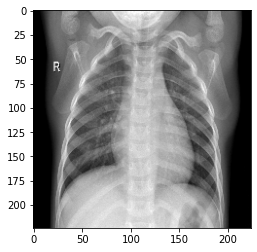

In [ ]:
print("Testing the result with Normal X-ray")
normal_path="/content/drive/MyDrive/Colab Notebooks/dataset/normal/IM-0253-0001.jpeg"
test_2 = get_array(normal_path)
im = cv2.imread(normal_path)
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
result_2 = model.predict_classes(test_2)
print(output[result_2[0][0]])

Normal patient
